<a href="https://colab.research.google.com/github/jrleonett/Deteccion-Objetos-con-Vision-Computacional/blob/main/visioncomputacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de imágenes con YOLO y Visión por Computadora

Este proyecto utiliza el modelo YOLO (You Only Look Once) para procesar imágenes y detectar objetos en ellas. El código está dividido en tres fases principales: creación de una carpeta para almacenar resultados, procesamiento de la imagen y descarga de los resultados en un archivo ZIP. Realizado por **José R. Leonett** para la comunidad de peritos forenses digitales de Guatemala www.forensedigital.gt

In [1]:
#@title Módulo 1: Carga del modelo YOLO y creación de la carpeta "EVIDENCIAS"
%%capture

import os
import cv2

# Crear la carpeta "EVIDENCIAS" si no existe
if not os.path.exists('EVIDENCIAS'):
    os.makedirs('EVIDENCIAS')
    print("Carpeta 'EVIDENCIAS' creada.")
else:
    print("La carpeta 'EVIDENCIAS' ya existe.")

# Descargar los archivos de YOLO si no existen
if not os.path.exists("yolov3.cfg") or not os.path.exists("yolov3.weights") or not os.path.exists("coco.names"):
    print("Descargando archivos de YOLO...")
    !wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg
    !wget https://pjreddie.com/media/files/yolov3.weights
    !wget https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O coco.names
    print("Archivos de YOLO descargados correctamente.")

# Cargar YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# Definir colores para cada clase
class_colors = {
    "person": (0, 255, 255),        # Amarillo para personas
    "motorbike": (0, 165, 255),     # Naranja para motocicletas
    "car": (255, 0, 0),             # Azul para coches
    "bicycle": (0, 255, 0),         # Verde para bicicletas
    "bus": (0, 255, 255),           # Amarillo para buses
    "truck": (0, 0, 255),           # Rojo para camiones
    # Agrega más clases y colores aquí según sea necesario

    # Vehículos
    "car": (255, 0, 0),              # Azul para automóviles
    "truck": (0, 0, 255),            # Rojo para camiones
    "bus": (0, 255, 255),            # Amarillo para buses
    "motorbike": (0, 165, 255),      # Naranja para motocicletas
    "bicycle": (0, 255, 0),          # Verde para bicicletas
    "aeroplane": (255, 192, 203),    # Rosa para aviones
    "train": (128, 128, 128),        # Gris para trenes
    "boat": (0, 0, 128),             # Azul oscuro para barcos

    # Personas
    "person": (0, 255, 255),         # Amarillo para personas
    # Nota: YOLO no distingue entre adultos, niños, bebés, etc.

    # Animales
    "dog": (139, 69, 19),            # Marrón para perros
    "cat": (255, 140, 0),            # Naranja oscuro para gatos
    "horse": (165, 42, 42),          # Marrón oscuro para caballos
    "sheep": (192, 192, 192),        # Gris claro para ovejas
    "cow": (128, 128, 0),            # Oliva para vacas
    "bird": (0, 255, 127),           # Verde primavera para pájaros

    # Objetos cotidianos
    "chair": (139, 69, 19),          # Marrón para sillas
    "diningtable": (160, 82, 45),    # Sienna para mesas
    "sofa": (205, 133, 63),          # Peru para sofás
    "bed": (222, 184, 135),          # Madera para camas
    "tvmonitor": (0, 0, 139),        # Azul oscuro para televisores

    # Naturaleza
    "pottedplant": (50, 205, 50),    # Verde lima para plantas en macetas
    # Nota: YOLO no detecta montañas, ríos, lagos, etc.

    # Alimentos
    # Nota: YOLO no detecta frutas, verduras, carnes, etc.

    # Deportes
    "sports ball": (255, 0, 0),      # Rojo para balones de fútbol
    # Nota: YOLO no detecta raquetas, bates, tablas de surf, etc.

    # Señales y símbolos
    "stop sign": (255, 0, 0),        # Rojo para señales de tráfico
    "traffic light": (0, 255, 0),    # Verde para semáforos
}

print("Modelo YOLO cargado y listo para usar.")

Imagen original y detecciones:


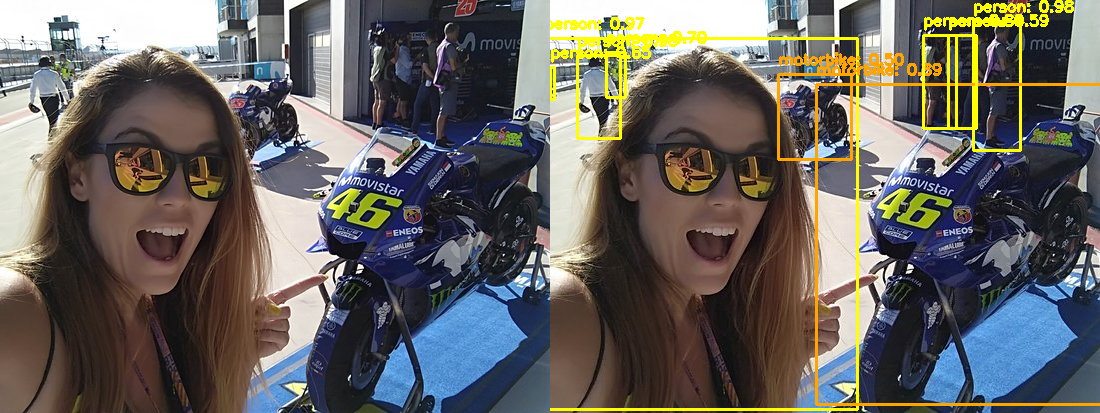


Cantidad de objetos detectados por clase:
PERSON: 07
MOTORBIKE: 02

Imagen con detecciones guardada en EVIDENCIAS/selfie-moto_detectAI.jpg
Conteos guardados en EVIDENCIAS/selfie-moto_detectAI.txt


In [3]:
#@title Módulo 2: Procesamiento de la imagen y generación de resultados

import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Verificar si hay imágenes en la carpeta "EVIDENCIAS"
evidencia_files = os.listdir('EVIDENCIAS')
image_extensions = ['.jpg', '.jpeg', '.png']
image_name = None

# Buscar la primera imagen válida en la carpeta
for file in evidencia_files:
    if any(file.lower().endswith(ext) for ext in image_extensions):
        image_name = file
        break

# Si no se encuentra ninguna imagen, informar y salir
if not image_name:
    print("FAVOR CARGAR ARCHIVO DE IMAGEN A LA CARPETA EVIDENCIAS.")
    exit()  # Salir del programa sin errores

# Cargar la imagen
image_path = os.path.join('EVIDENCIAS', image_name)
image = cv2.imread(image_path)

# Si no se puede cargar la imagen, informar y salir
if image is None:
    print("No se pudo cargar la imagen. Asegúrate de que el archivo sea un JPG o PNG válido.")
    exit()

# Obtener dimensiones de la imagen
height, width, _ = image.shape

# Preprocesar la imagen para YOLO
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Obtener las capas de salida
layer_names = net.getLayerNames()
output_layers_indices = net.getUnconnectedOutLayers()

# Verificar si output_layers_indices es una lista de listas o una lista de enteros
if isinstance(output_layers_indices[0], list):
    output_layers = [layer_names[i[0] - 1] for i in output_layers_indices]
else:
    output_layers = [layer_names[i - 1] for i in output_layers_indices]

detections = net.forward(output_layers)

# Procesar las detecciones
conf_threshold = 0.5
nms_threshold = 0.4
boxes = []
confidences = []
class_ids = []

for output in detections:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Aplicar Non-Maximum Suppression (NMS)
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# Contar objetos detectados por clase
object_counts = {}
for i in indices:
    i = i[0] if isinstance(i, (list, np.ndarray)) else i
    class_name = classes[class_ids[i]]
    if class_name in object_counts:
        object_counts[class_name] += 1
    else:
        object_counts[class_name] = 1

# Dibujar las cajas y etiquetas en la imagen con colores específicos por clase
image_detected = image.copy()
for i in indices:
    i = i[0] if isinstance(i, (list, np.ndarray)) else i
    box = boxes[i]
    x, y, w, h = box
    class_name = classes[class_ids[i]]
    confidence = confidences[i]

    # Obtener el color para la clase actual
    color = class_colors.get(class_name, (0, 255, 0))  # Verde por defecto si no se encuentra la clase

    # Dibujar el rectángulo y la etiqueta
    cv2.rectangle(image_detected, (x, y), (x + w, y + h), color, 2)
    label = f"{class_name}: {confidence:.2f}"
    cv2.putText(image_detected, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Mostrar la imagen original y la imagen con detecciones lado a lado
print("Imagen original y detecciones:")
combined_image = np.hstack((image, image_detected))  # Combinar imágenes horizontalmente
cv2_imshow(combined_image)

# Mostrar la cantidad de objetos detectados por clase
print("\nCantidad de objetos detectados por clase:")
for class_name, count in object_counts.items():
    print(f"{class_name.upper()}: {count:02d}")

# Guardar la imagen con detecciones
output_image_name = image_name.replace(".jpg", "_detectAI.jpg").replace(".jpeg", "_detectAI.jpg").replace(".png", "_detectAI.png")
output_image_path = os.path.join('EVIDENCIAS', output_image_name)
cv2.imwrite(output_image_path, image_detected)
print(f"\nImagen con detecciones guardada en {output_image_path}")

# Guardar los conteos en un archivo TXT
output_txt_name = image_name.replace(".jpg", "_detectAI.txt").replace(".jpeg", "_detectAI.txt").replace(".png", "_detectAI.txt")
output_txt_path = os.path.join('EVIDENCIAS', output_txt_name)
with open(output_txt_path, 'w') as f:
    f.write("Cantidad de objetos detectados por clase:\n")
    for class_name, count in object_counts.items():
        f.write(f"{class_name.upper()}: {count:02d}\n")
print(f"Conteos guardados en {output_txt_path}")

In [4]:
#@title Fase 3: Descargar los resultados en un archivo ZIP

import zipfile
from google.colab import files

# Crear un archivo ZIP con las imágenes de la carpeta "EVIDENCIAS"
zip_path = 'EVIDENCIAS.zip'
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files_in_folder in os.walk('EVIDENCIAS'):
        for file in files_in_folder:
            file_path = os.path.join(root, file)
            zipf.write(file_path, arcname=file)

# Descargar el archivo ZIP
files.download(zip_path)
print(f"Archivo {zip_path} descargado.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo EVIDENCIAS.zip descargado.
